In [1]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('./processed_data.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1,1,0,3,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45,1,1,110,264,0,0,132,0,1,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0,1,0,3,0


In [5]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# how many classes are in target variable?
df['target'].value_counts()

target
0    164
1    139
Name: count, dtype: int64

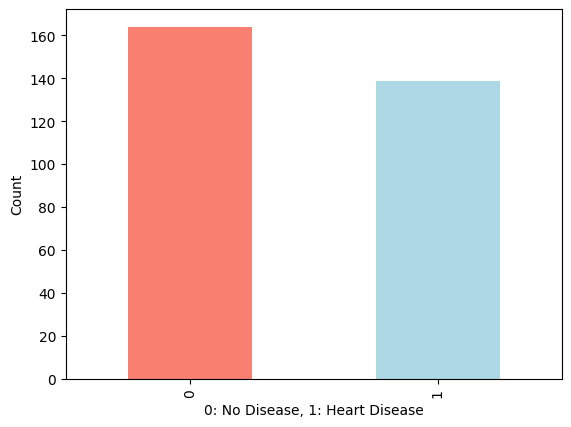

In [7]:
df['target'].value_counts().plot.bar(color=['salmon', 'lightblue']);
plt.xlabel('0: No Disease, 1: Heart Disease')
plt.ylabel('Count');

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,0.765677,1.070933,0.0,0.0,0.0,1.0,6.0


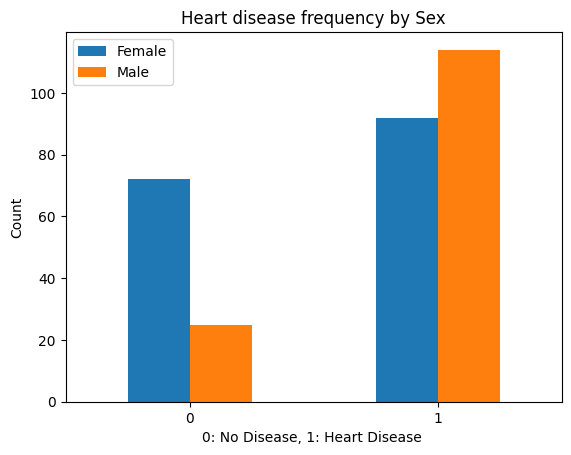

In [9]:
# visualize the data
# pd.crosstab(df['sex'], df['target']).plot(kind='bar', color=['salmon', 'lightblue']);

pd.crosstab(df['sex'], df['target']).plot(kind='bar');
plt.title('Heart disease frequency by Sex')
plt.xlabel('0: No Disease, 1: Heart Disease ')
plt.ylabel('Count')
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

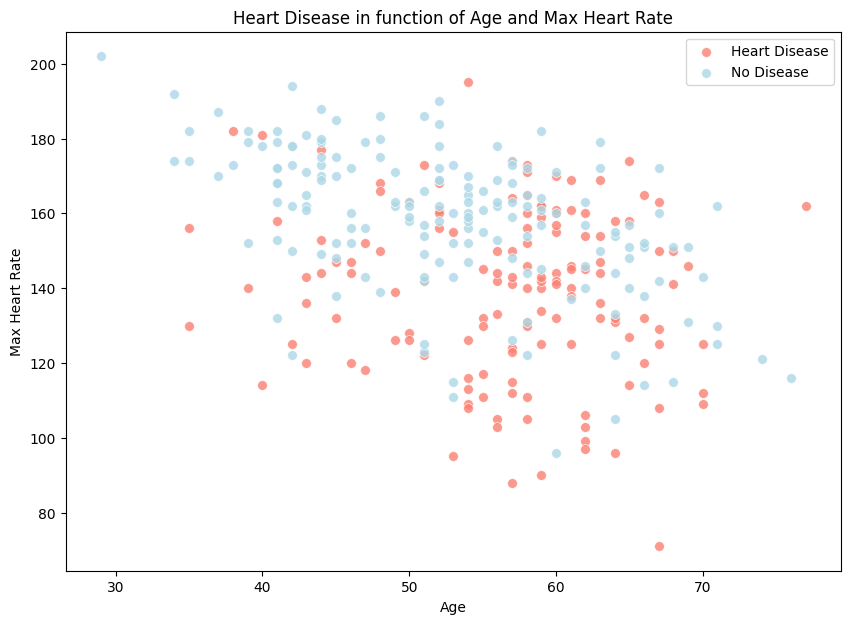

In [10]:
plt.figure(figsize=(10, 7))

# positive cases
sns.scatterplot(data=df, x=df.age[df.target==1], y=df.thalach[df.target==1], color='salmon', s=50, alpha=0.8);

# negative cases
sns.scatterplot(data=df, x=df.age[df.target==0], y=df.thalach[df.target==0], color='lightblue', s=50, alpha=0.8)

plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate');
plt.legend(['Heart Disease', 'No Disease']);

In [11]:
pd.crosstab(df['target'], df['cp'])

cp,1,2,3,4
target,,,,
0,16,41,68,39
1,7,9,18,105


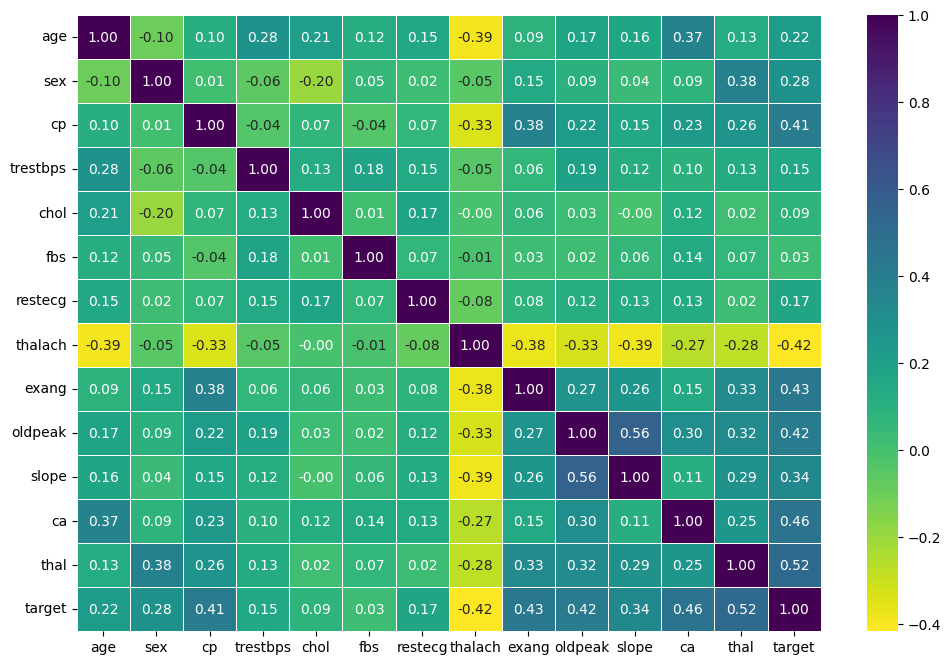

In [12]:
# visualization
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt='.2f', cmap='viridis_r');

In [13]:
# split features and labels
X = df.drop('target', axis=1)
y = df['target']

In [14]:
# split into training, testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [16]:
# put models in dictionary

models = {
    'LogisticRegression': LogisticRegression(max_iter=10000),
    'KNN': KNeighborsClassifier(),
    'RandomForestClassifer': RandomForestClassifier()
}

# create function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evalute given machine learning models.
    models: a dictionary of different scikit learn machine learning models
    X_train: training date (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test : testing labels
    returns model scores dictionary.
    """
    
    # set random seed
    np.random.seed(42)
    
    # make dictonary to keep scores
    model_scores = {}
    
    # loop through models to fit and score
    for model_name, model in models.items():
        model.fit(X_train, y_train) # fit model
        score = model.score(X_test, y_test) # get score
        model_scores[model_name] = score # put score for each model
        
    return model_scores        

In [17]:
# fit and score
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifer': 0.8852459016393442}

In [18]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.head()

,LogisticRegression,KNN,RandomForestClassifer
accuracy,0.885246,0.688525,0.885246


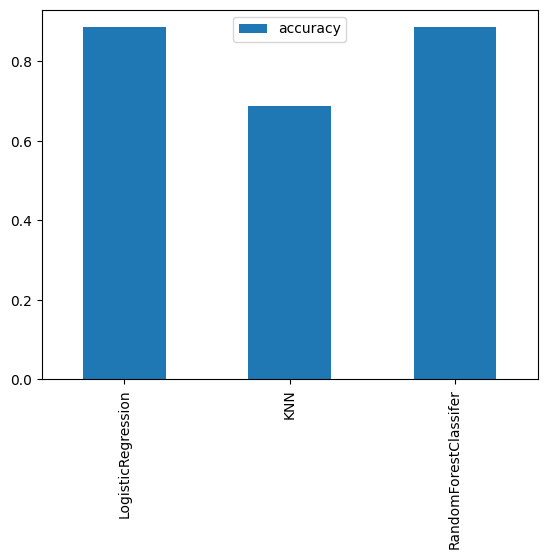

In [19]:
model_compare.T.plot(kind='bar');